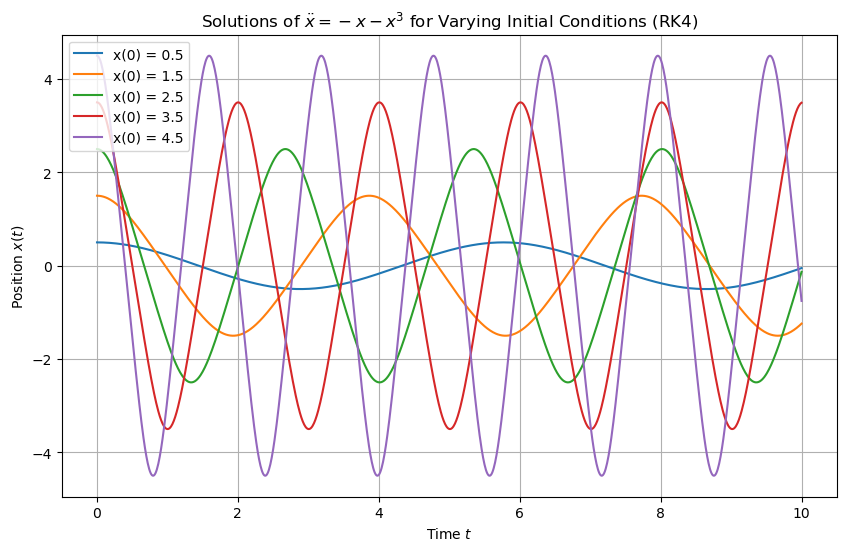

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Define the RK4 method
def rk4(t0, t_end, h, y0, system_of_odes):
    n_steps = int((t_end - t0) / h) + 1  # Number of steps
    t_values = np.linspace(t0, t_end, n_steps)  # Time points
    
    # to store the position and velocity arrays, in a vector form
    y_values = np.zeros((n_steps, len(y0))) 
    y_values[0] = y0  # Set the initial condition, again a vector passed later

    for i in range(1, n_steps): # this is where current solution is calculated
        t_current = t_values[i - 1]
        y_current = y_values[i - 1]

        # Compute k1, k2, k3, k4 using system_of_odes
        k1 = system_of_odes(t_current, y_current)
        k2 = system_of_odes(t_current + h / 2, y_current + h * k1 / 2)
        k3 = system_of_odes(t_current + h / 2, y_current + h * k2 / 2)
        k4 = system_of_odes(t_current + h, y_current + h * k3)

        # Update the solution using the RK4 formula
        y_values[i] = y_current + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t_values, y_values # returns the time array, the pos and vel arrays in vector form 

# Define the second-order ODE system, as given in the question
def given_system(t, y):
    dydt = np.zeros_like(y) # copies the dimensions of the vector storing the velocity matrices
    dydt[0] = y[1]              # x' = velocity
    dydt[1] = -y[0] - y[0]**3   # x" = -x - x^3
    return dydt

# Initial conditions
x0_values = np.arange(0.5, 5.5, 1)  # Initial values for x(0), 5 values as asked in the question
t0 = 0                                # Start time
t_end = 20                           # End time
h = 0.01                              # Step size

# Prepare the plot, all to be displayed in a single plot for comparison
plt.figure(figsize=(10, 6))

# Solve the ODE for each initial condition
for x0 in x0_values:
    y0 = [x0, 0]  # Initial conditions: x(0) = x0, x'(0) = 0
    t, y = rk4(t0, t_end, h, y0, given_system)
    x = y[:, 0]  # Extract x(t), the first vector
    plt.plot(t, x, label=f"x(0) = {x0:.1f}")

# Plot detaisl
plt.title("Solutions of $\\ddot{x} = -x - x^3$ for Varying Initial Conditions (RK4)")
plt.xlabel("Time $t$")
plt.ylabel("Position $x(t)$")
plt.grid(True)
plt.legend()
plt.show()

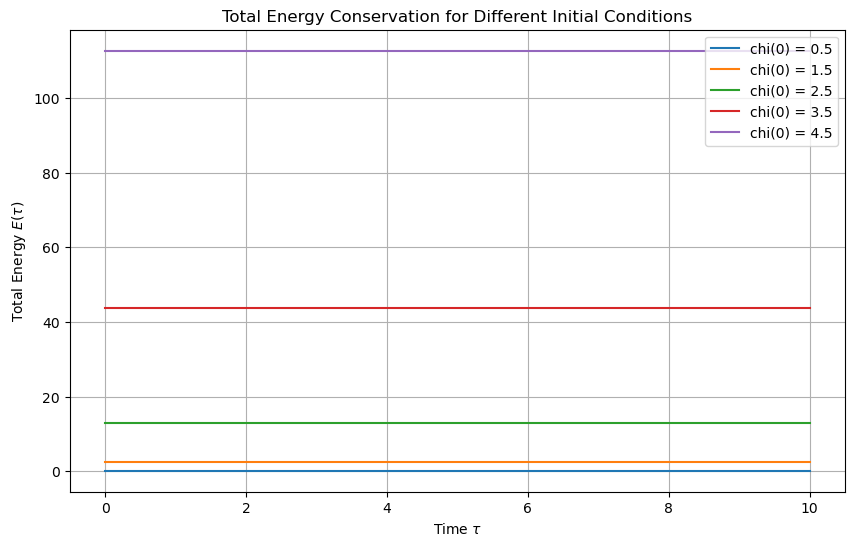

In [20]:
# Function to compute total energy 
def compute_energy(chi, chi_dot):
    # as defined in the explanations, we compute the energy terms in terms of the reduced variables
    kinetic_energy = 0.5 * chi_dot**2  
    potential_energy = 0.5 * chi**2 + 0.25 * chi**4  
    total_energy = kinetic_energy + potential_energy  
    return total_energy

# Plot for Energy Conservation
plt.figure(figsize=(10, 6))
for x0 in x0_values:
    y0 = [x0, 0]  # Initial conditions: chi(0) = x0, chi'(0) = 0
    t, y = rk4(t0, t_end, h, y0, given_system)  # Solve the ODE
    x = y[:, 0]  # Extract chi(t)
    x_dot = y[:, 1]  # Extract chi'(t)
    energy = compute_energy(x, x_dot)  # Compute total energy
    plt.plot(t, energy, label=f"chi(0) = {x0}")
plt.title("Total Energy Conservation for Different Initial Conditions")
plt.xlabel("Time $\\tau$")
plt.ylabel("Total Energy $E(\\tau)$")
plt.grid(True)
plt.legend()
plt.show()

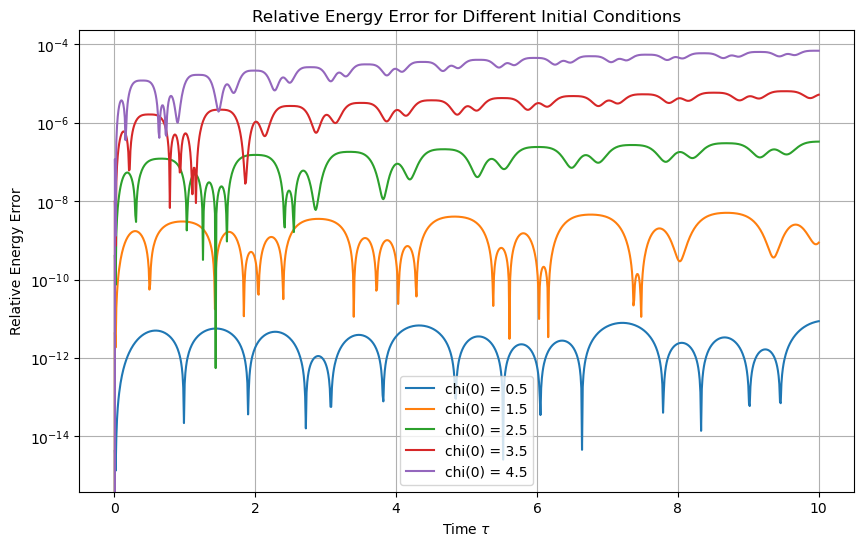

In [21]:
# Plot 3: Relative Energy Error
plt.figure(figsize=(10, 6))

for x0 in x0_values:
    y0 = [x0, 0]  
    t, y = rk4(t0, t_end, h, y0, given_system) 
    
    chi = y[:, 0]  
    chi_dot = y[:, 1]  
    energy = compute_energy(chi, chi_dot)
    
    relative_error = np.abs((energy - energy[0]))  # Relative error
    plt.plot(t, relative_error, label=f"chi(0) = {x0}")
    
plt.title("Relative Energy Error for Different Initial Conditions")
plt.xlabel("Time $\\tau$")
plt.ylabel("Relative Energy Error")
plt.grid(True)
plt.legend()
plt.yscale("log")  # Log scale for better visualization
plt.show()